# Images as numpy arrays

This notebook shows the basics of working with images as numpy arrays in python.

**NOTE:** the code depends on the `img_env` conda environment found in [workflow/envs/main.yml](../workflow/envs/main.yml)

### configure notebook

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print('DONE!')

DONE!


### viewing images with matplotlib

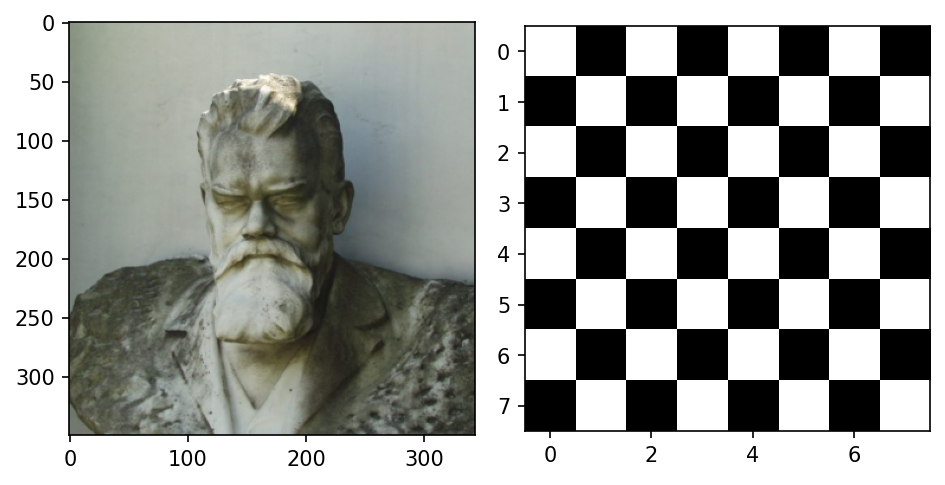

In [2]:
boltzmann = plt.imread('data/boltzmann.png')
chess = np.array([
    [0, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 0],
])

fig, ax = plt.subplots(1, 2, dpi=150)
ax[0].imshow(boltzmann, cmap='Greys')
ax[1].imshow(chess, cmap='Greys')
plt.tight_layout()
plt.savefig('figures/boltzmann_chess.png', dpi=150)
plt.show()


### inspect input data (2D binary arrays as text files)

In [3]:
!cat data/arr1.txt | column -t

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  1  0  0  1  0  1  0  1  0  1  0  0  1  1  0  0  1  1  1  0
0  1  0  0  1  0  1  0  1  0  1  0  1  0  0  0  0  1  0  0  0
0  1  0  0  1  0  1  0  1  0  1  0  1  0  1  1  0  1  1  1  0
0  1  0  0  1  0  1  0  1  0  1  0  1  0  0  1  0  0  0  1  0
0  0  1  1  0  0  0  1  0  1  0  0  0  1  1  0  0  1  1  1  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0


In [4]:
!cat data/arr2.txt | column -t

0  0  0  0  0  0  0  0  0  0  0  0  0
0  1  1  1  0  1  0  1  0  1  1  1  0
0  1  0  0  0  1  0  1  0  1  0  1  0
0  1  1  1  0  1  1  1  0  1  0  1  0
0  0  0  1  0  0  0  1  0  1  0  1  0
0  1  1  1  0  0  0  1  0  1  1  1  0
0  0  0  0  0  0  0  0  0  0  0  0  0


### load arrays and convert to numpy

In [5]:
def load_arr(file_path):
    '''Load a 2D array from a text file and convert it to a numpy array.'''
    arr = pd.read_csv(file_path, sep='\t', header=None).values
    return arr

arr1 = load_arr('data/arr1.txt')
arr2 = load_arr('data/arr2.txt')
print(f'Array 1:\n{arr1}\nArray 2:\n{arr2}')

Array 1:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0]
 [0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0]
 [0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0]
 [0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0]
 [0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Array 2:
[[0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 1 0 1 0 1 1 1 0]
 [0 1 0 0 0 1 0 1 0 1 0 1 0]
 [0 1 1 1 0 1 1 1 0 1 0 1 0]
 [0 0 0 1 0 0 0 1 0 1 0 1 0]
 [0 1 1 1 0 0 0 1 0 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]]


### view arrays as images using matplotlib

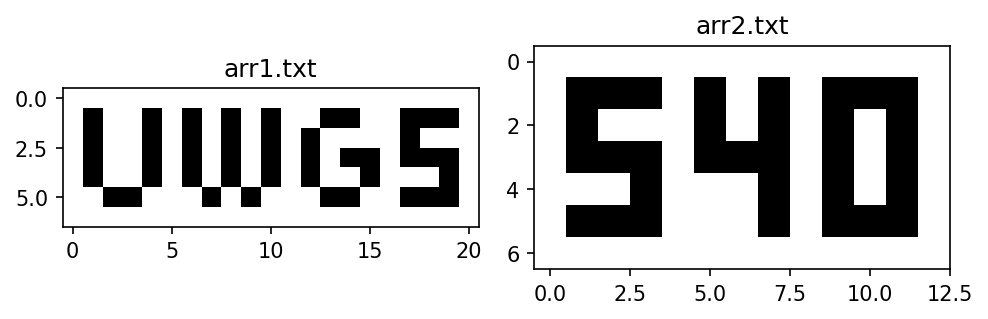

In [6]:
fig, ax = plt.subplots(1, 2, dpi=150)
ax[0].imshow(arr1, cmap='Greys')
ax[0].set_title('arr1.txt')
ax[1].imshow(arr2, cmap='Greys')
ax[1].set_title('arr2.txt')
plt.tight_layout()
plt.show()

### create a mask as a handle to only digit pixels

In [7]:
# work with array2 for now
img = arr2.copy()

# create a mask for digit pixels in the 540 image
mask = (img == 1)
print(f'540 Digit Mask:\n{mask.astype(int)}')

540 Digit Mask:
[[0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 1 0 1 0 1 1 1 0]
 [0 1 0 0 0 1 0 1 0 1 0 1 0]
 [0 1 1 1 0 1 1 1 0 1 0 1 0]
 [0 0 0 1 0 0 0 1 0 1 0 1 0]
 [0 1 1 1 0 0 0 1 0 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]]


### use the mask to selectively change digit-pixel values

In [8]:
img[mask] = 99
print(img)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 99 99 99  0 99  0 99  0 99 99 99  0]
 [ 0 99  0  0  0 99  0 99  0 99  0 99  0]
 [ 0 99 99 99  0 99 99 99  0 99  0 99  0]
 [ 0  0  0 99  0  0  0 99  0 99  0 99  0]
 [ 0 99 99 99  0  0  0 99  0 99 99 99  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]]


### create masks for the left, middle, and right sections of the image

In [9]:
# create left, middle, and right masks
left = np.zeros(img.shape).astype(bool)
middle = left.copy()
right = middle.copy()
left[:,:4] = True
middle[:,4:8] = True
right[:,8:] = True

print(f'Left mask:\n{left.astype(int)}')
print(f'Middle mask:\n{middle.astype(int)}')
print(f'Right mask:\n{right.astype(int)}')

Left mask:
[[1 1 1 1 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0]]
Middle mask:
[[0 0 0 0 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0 0]]
Right mask:
[[0 0 0 0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1 1]]


### use masks in combination with conditional logic to set each digit

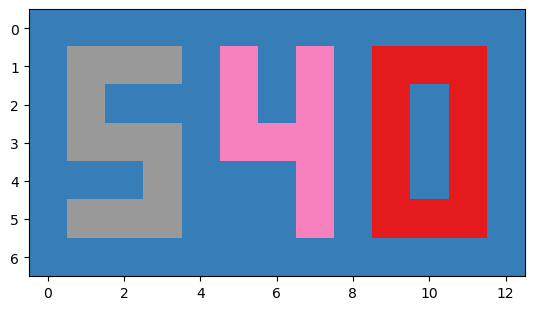

In [10]:
# invert the image, for a background of 1's
img = 1 - img

# set individual digits
img[mask & left] = 5
img[mask & middle] = 4
img[mask & right] = 0

# display image array
plt.imshow(img, cmap='Set1')
plt.show()